In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Lion
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns; sns.set() # For a nicer plot style
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#폰트 설치
plt.rc('font', family='NanumBarunGothic')

#패키지 import

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
display(df)

,관측일시,가뭄(MSWSI),가뭄(SPI6),평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
0,2013-01-05,0.0,0.0,53.920000,0.693467,0.137613,-9.466667,-0.486933
1,2013-01-12,-0.5,0.0,51.014286,0.721000,0.000000,-6.942857,-0.558000
2,2013-01-19,0.0,0.0,48.357143,0.722286,0.000000,-4.957143,-0.524143
3,2013-01-26,0.0,0.0,45.985714,0.722571,3.638271,-4.571429,-0.523429
4,2013-02-02,0.5,0.0,43.671429,0.718286,2.076014,-0.828571,-0.222714
...,...,...,...,...,...,...,...,...
621,2024-11-30,0.5,0.0,68.400000,0.358571,1.304057,0.885714,-0.131571
622,2024-12-07,0.0,0.0,67.742857,0.373571,0.000000,0.942857,-0.177857
623,2024-12-14,-0.5,0.0,66.757143,0.388429,0.000000,-2.257143,-0.230429
624,2024-12-21,-0.5,0.0,65.557143,0.352857,0.076014,-3.271429,-0.258429


In [ ]:
df = df.set_index('관측일시')#인덱스로 설정

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2013-01-05 to 2024-12-28
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가뭄(MSWSI)   626 non-null    float64
 1   가뭄(SPI6)    626 non-null    float64
 2   평균 저수율      626 non-null    float64
 3   평균 용수공급량    626 non-null    float64
 4   평균 강우량      626 non-null    float64
 5   평균기온        626 non-null    float64
 6   평균 유입량-뱡류량  626 non-null    float64
dtypes: float64(7)
memory usage: 39.1+ KB


In [ ]:
target=['가뭄(MSWSI)','가뭄(SPI6)']
X = df.drop(target, axis=1)
y = df[target]

In [ ]:

#train, test 데이터 나누기
test_size = 52#24년 데이터 개수
X_train, X_test = X[:-test_size], X[-test_size:]#독립변수 분할
y_train, y_test = y[:-test_size], y[-test_size:]#종속변수 분할
y_train_mswsi=y_train['가뭄(MSWSI)']
y_train_spi=y_train['가뭄(SPI6)']
y_test_mswsi=y_test['가뭄(MSWSI)']
y_test_spi=y_test['가뭄(SPI6)']

print(y_train_mswsi)
print(y_test_mswsi)
print(y_train_spi)
print(y_test_spi)


관측일시
2013-01-05    0.0
2013-01-12   -0.5
2013-01-19    0.0
2013-01-26    0.0
2013-02-02    0.5
             ... 
2023-12-02   -0.5
2023-12-09    0.0
2023-12-16    2.0
2023-12-23    1.5
2023-12-30    0.5
Name: 가뭄(MSWSI), Length: 574, dtype: category
Categories (8, float64): [-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]
관측일시
2024-01-06    0.0
2024-01-13    0.0
2024-01-20    0.5
2024-01-27    0.0
2024-02-03   -0.5
2024-02-10    1.0
2024-02-17    0.5
2024-02-24    2.0
2024-03-02    0.5
2024-03-09    0.0
2024-03-16   -0.5
2024-03-23    1.0
2024-03-30    1.5
2024-04-06    0.5
2024-04-13   -0.5
2024-04-20    0.0
2024-04-27   -0.5
2024-05-04   -0.5
2024-05-11    0.0
2024-05-18    0.0
2024-05-25   -0.5
2024-06-01   -0.5
2024-06-08   -1.0
2024-06-15   -1.0
2024-06-22   -0.5
2024-06-29   -0.5
2024-07-06    0.0
2024-07-13    0.5
2024-07-20    0.0
2024-07-27    0.0
2024-08-03   -1.0
2024-08-10   -1.0
2024-08-17   -1.5
2024-08-24   -1.0
2024-08-31   -1.0
2024-09-07   -1.0
2024-09-14   -0.5
2024-09-21 

In [ ]:
#라벨인코딩(원핫 사요안하기로 함)
from sklearn.preprocessing import LabelEncoder
# MSWSI용 encoder
le_mswsi = LabelEncoder()
y_train_mswsi = le_mswsi.fit_transform(y_train['가뭄(MSWSI)'])
y_test_mswsi  = le_mswsi.transform(y_test['가뭄(MSWSI)'])

# SPI6용 encoder
le_spi = LabelEncoder()
y_train_spi = le_spi.fit_transform(y_train['가뭄(SPI6)'])
y_test_spi  = le_spi.transform(y_test['가뭄(SPI6)'])


In [ ]:
# Initialize the Random Forest Classifier

rf_clf_mswsi = RandomForestClassifier( n_estimators=300, # 트리 개수
    max_depth=4,            # 각 트리 최대 깊이 (None=제한 없음)
    min_samples_split=4,     # 노드를 분할하기 위한 최소 샘플 수
    min_samples_leaf=2,      # 리프(끝 노드)에 필요한 최소 샘플 수
    class_weight='balanced', # 클래스 불균형 대응
    max_features=None,       # 모든 피처 사용
    random_state=42)

rf_clf_spi = RandomForestClassifier( n_estimators=300, # 트리 개수
    max_depth=4,            # 각 트리 최대 깊이 (None=제한 없음)
    min_samples_split=4,     # 노드를 분할하기 위한 최소 샘플 수
    min_samples_leaf=2,      # 리프(끝 노드)에 필요한 최소 샘플 수
    class_weight='balanced', # 클래스 불균형 대응
    max_features=None,       # 모든 피처 사용
    random_state=42)

In [ ]:
"""
이미범주형 변수여서 안해도 된다
y_train_mswsi = pd.cut(y_train_mswsi, bins=9, labels=False)  # 총9단계
y_test_mswsi = pd.cut(y_test_mswsi, bins=9, labels=False)    #총9단계
y_train_spi = pd.cut(y_train_spi, bins=9, labels=False)  # 총9단계
y_test_spi = pd.cut(y_test_spi, bins=9, labels=False)    #총9단계
"""
# Fit the model with the training data (using the discrete target variable)
rf_clf_mswsi.fit(X_train, y_train_mswsi)
rf_clf_spi.fit(X_train, y_train_spi)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=None,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=300, random_state=42)

In [ ]:
# Predict the test dataset
predictions = rf_clf_mswsi.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test_mswsi, predictions)
print(f"MSWSI Accuracy: {accuracy*100:.2f}%")

# Predict the test dataset
predictions = rf_clf_spi.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test_spi, predictions)
print(f"SPI6 Accuracy: {accuracy*100:.2f}%")


MSWSI Accuracy: 21.15%
SPI6 Accuracy: 19.23%


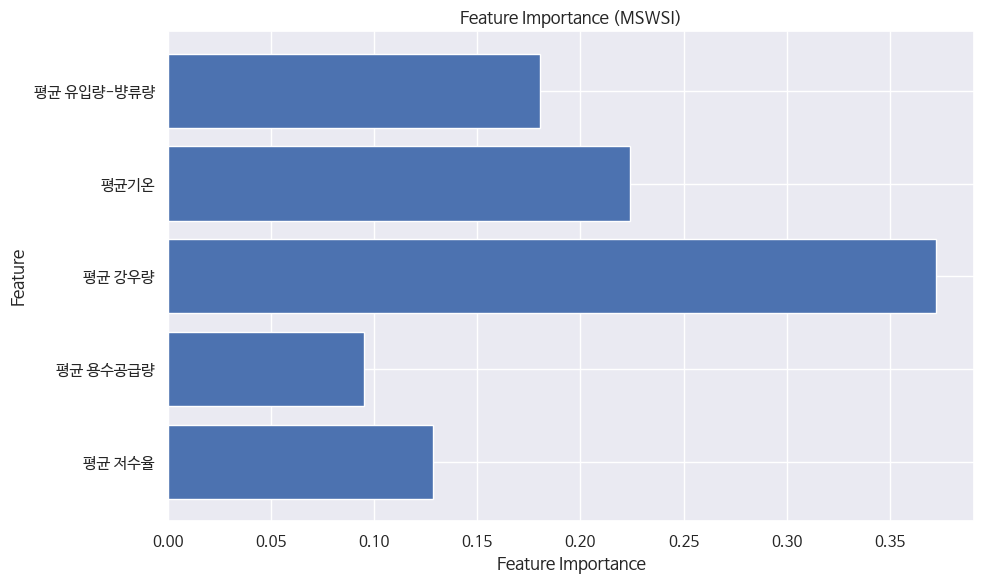

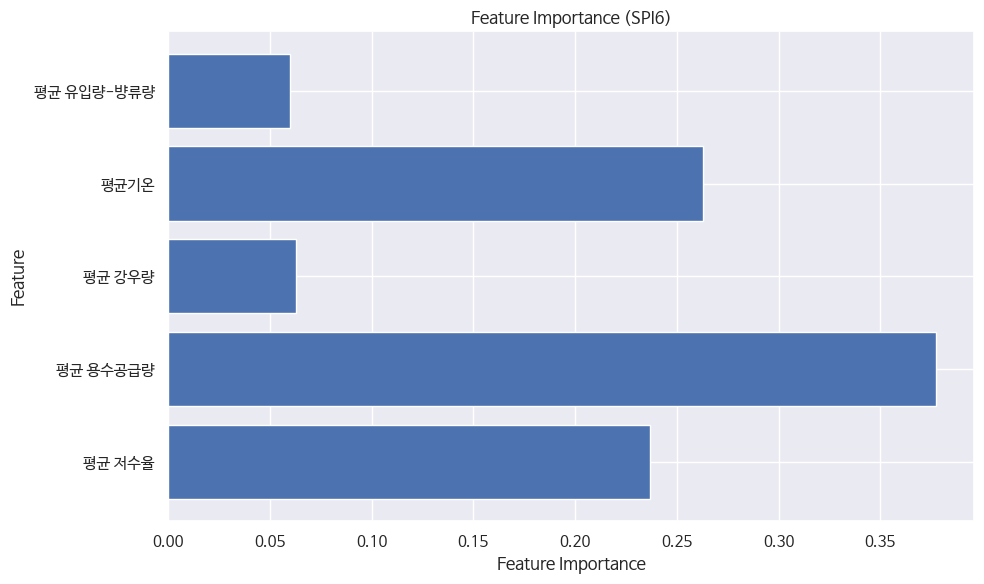

In [ ]:
# MSWSI
feat_imp_m = rf_clf_mswsi.feature_importances_
features = X_test.columns  # DataFrame 컬럼 이름

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), feat_imp_m, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (MSWSI)')
plt.tight_layout()
plt.show()

# SPI6
feat_imp_s = rf_clf_spi.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), feat_imp_s, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (SPI6)')
plt.tight_layout()
plt.show()


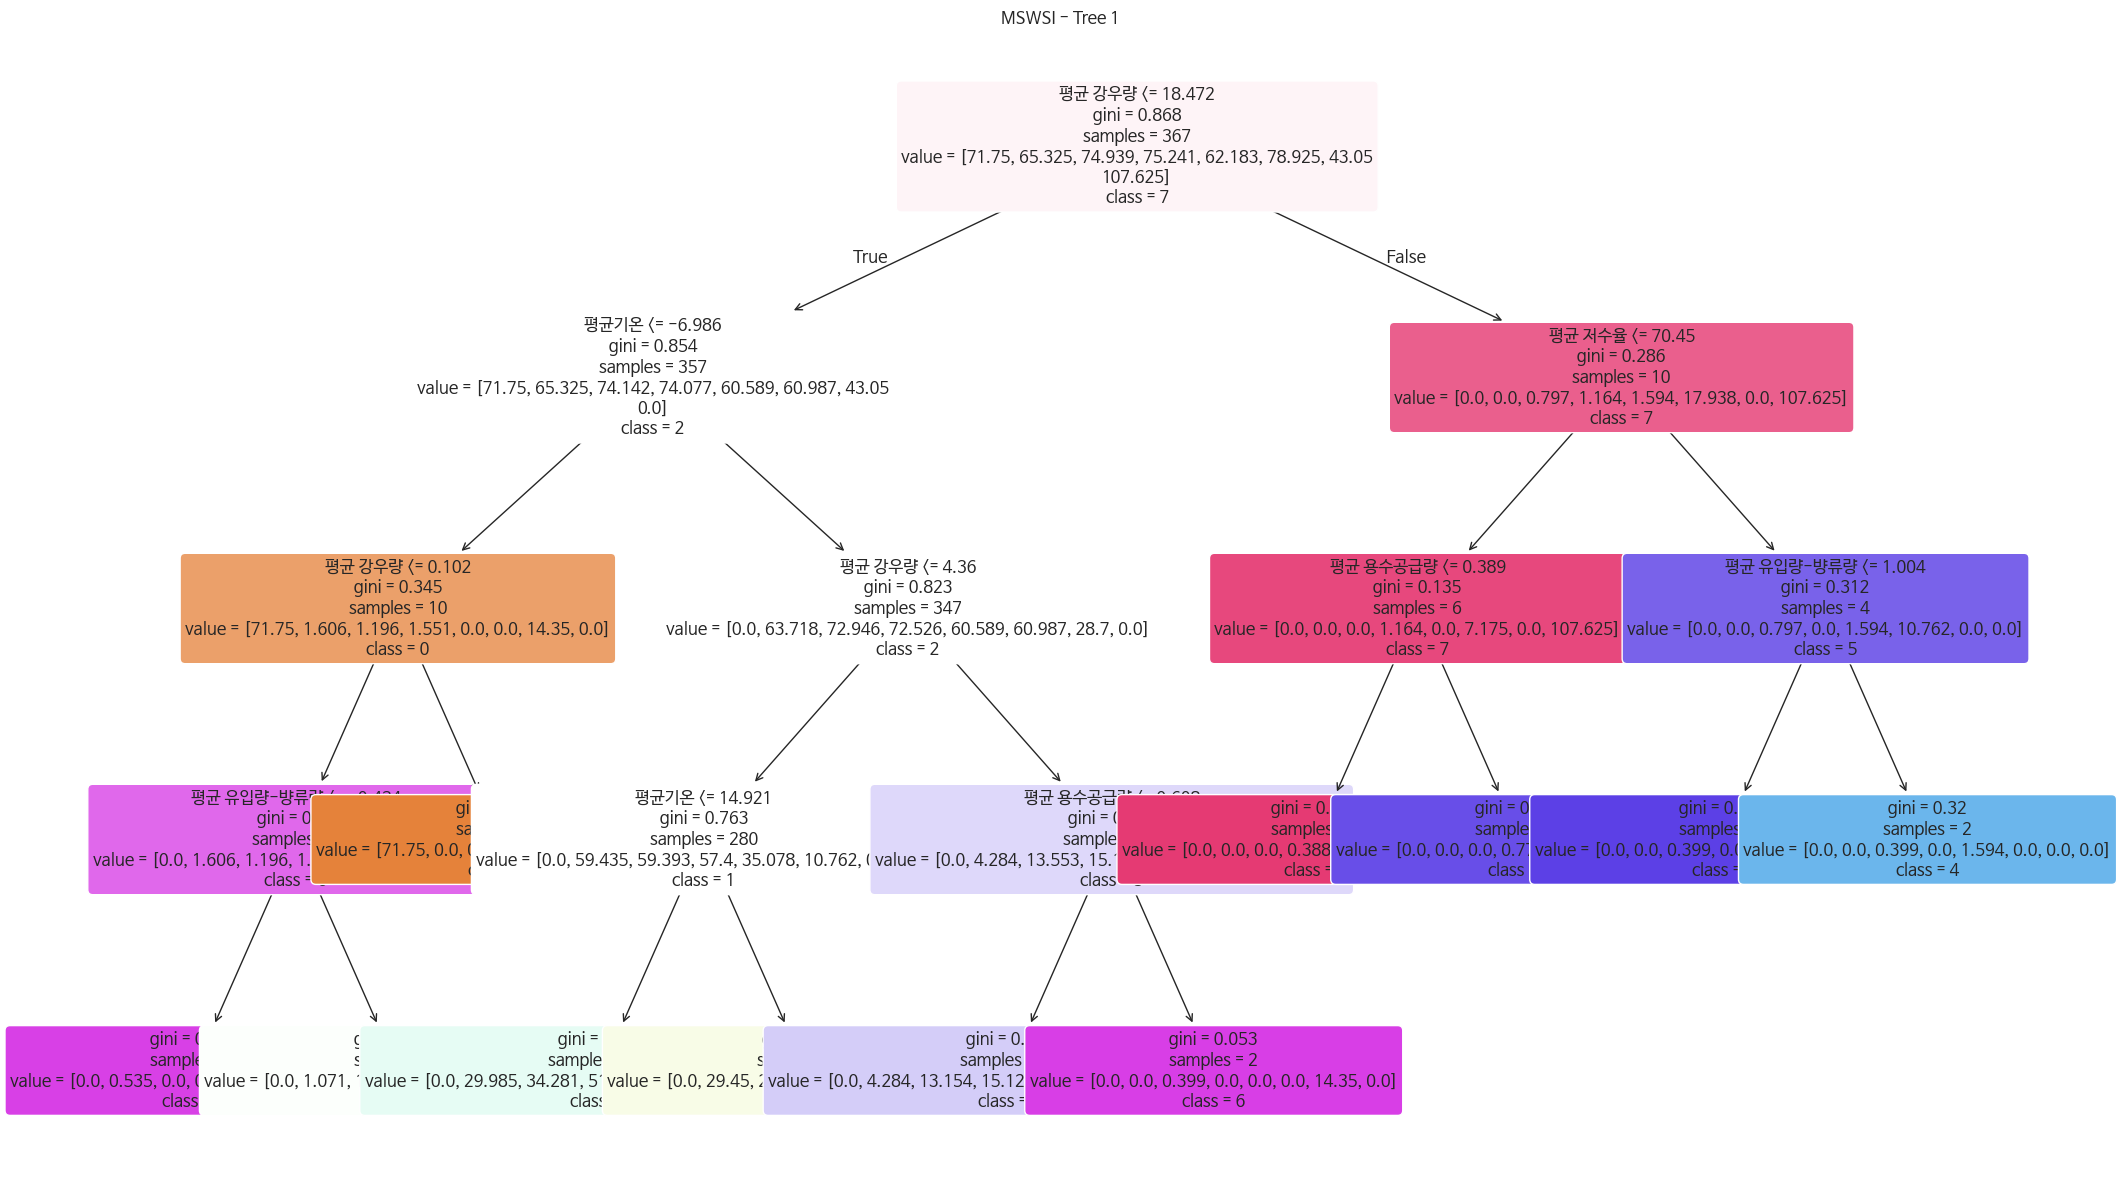

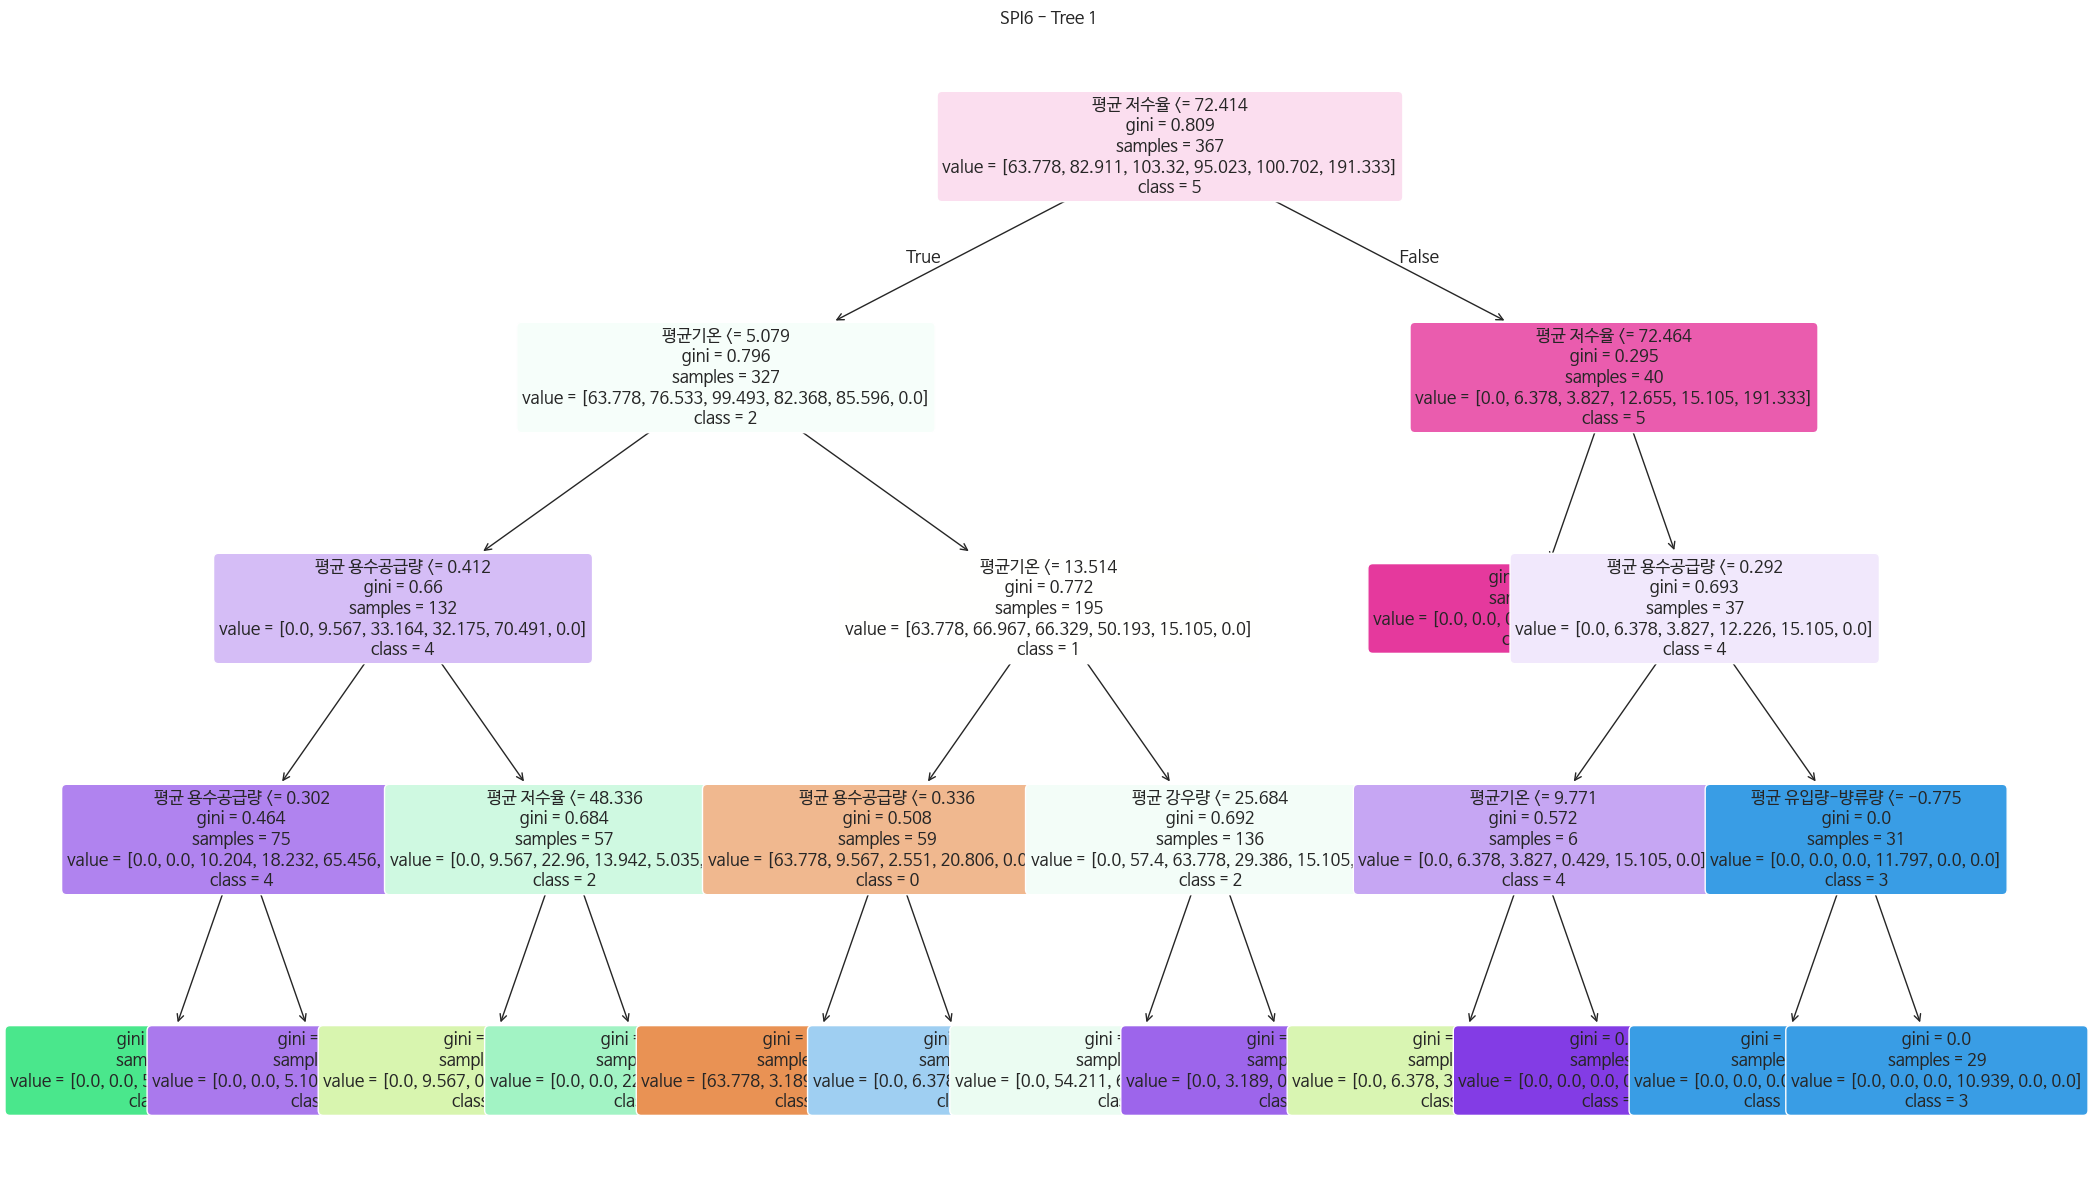

In [ ]:
from sklearn.tree import plot_tree
import numpy as np
# MSWSI 트리 시각화
plt.figure(figsize=(25, 15))
tree_index = 0  # 첫 번째 트리
class_names_m = [str(c) for c in np.unique(y_train_mswsi)]  # MSWSI 클래스 라벨

plot_tree(
    rf_clf_mswsi.estimators_[tree_index],
    filled=True,
    feature_names=X.columns,       # 입력 변수명
    class_names=class_names_m,     # 클래스 이름
    rounded=True,
    fontsize=12
)
plt.title(f"MSWSI - Tree {tree_index + 1}")
plt.show()

# SPI6 트리 시각화
plt.figure(figsize=(25, 15))
tree_index = 0
class_names_s = [str(c) for c in np.unique(y_train_spi)]    # SPI6 클래스 라벨

plot_tree(
    rf_clf_spi.estimators_[tree_index],
    filled=True,
    feature_names=X.columns,
    class_names=class_names_s,
    rounded=True,
    fontsize=12
)
plt.title(f"SPI6 - Tree {tree_index + 1}")
plt.show()


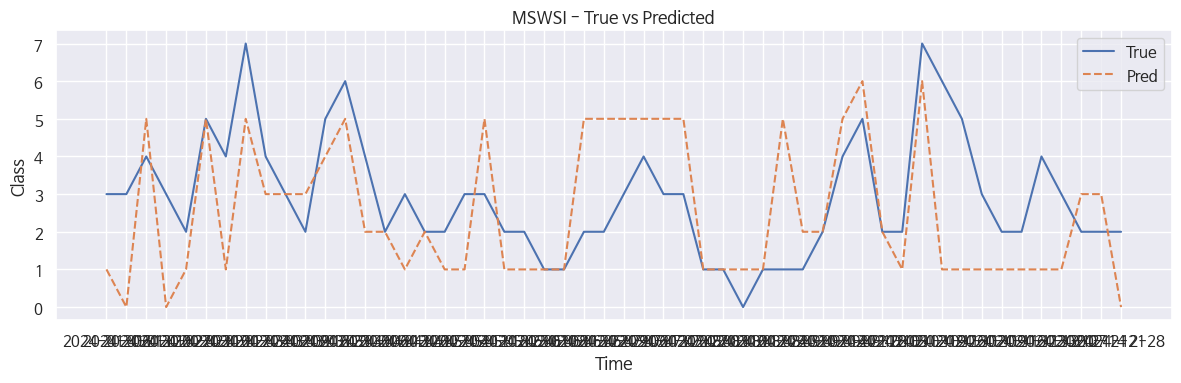

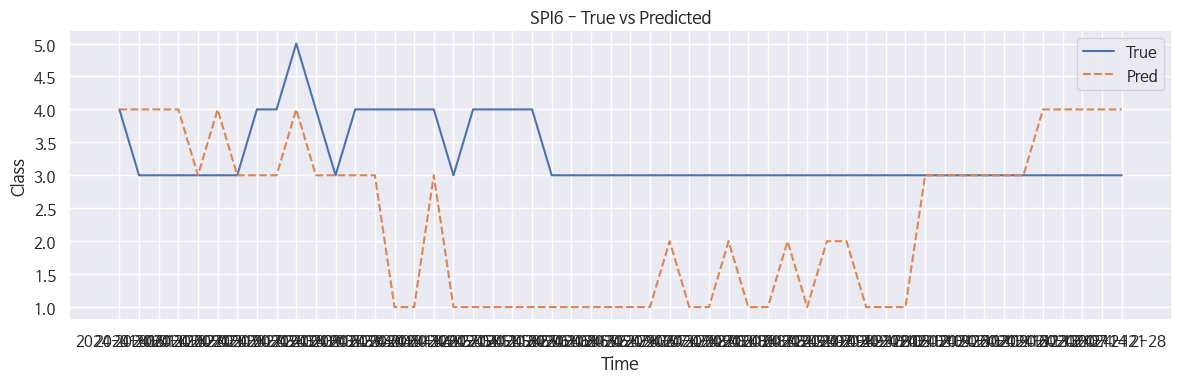

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(y_test.index, y_test_mswsi, label="True")
plt.plot(y_test.index, rf_clf_mswsi.predict(X_test), label="Pred", linestyle="--")
plt.title("MSWSI - True vs Predicted")
plt.xlabel("Time")
plt.ylabel("Class")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(y_test.index, y_test_spi, label="True")
plt.plot(y_test.index, rf_clf_spi.predict(X_test), label="Pred", linestyle="--")
plt.title("SPI6 - True vs Predicted")
plt.xlabel("Time")
plt.ylabel("Class")
plt.legend()
plt.tight_layout()
plt.show()
